# Digitale Sprachverarbeitung 


## Textsprache 

Webprogram -> 10101010 -> Modulation -> * El. Wellen * -> modulation -> 10101010 -> Webprogramm  
### Lautsprache 
Gedanke -> Gehirn -> Sprachaparat -> generiert Signal (Wie modulation) -> * Schallwellen * -> Höraparat -> Gehirn interpretiert -> Gedanken
### Geschriebene Sprache 
- Textsprache eindeutiger als Geschriebener, man kann mit Sprache viel mehr aussagen/ deuten 

* Zur Machineller Verarbeitung muss das Schallsignal in eine diskrete quantisierte Folge von einzelwerten umgewandelt werden. 
### Darstellungsmöglichkeiten von gesprochener Sprache. 
* Schallimpulse 
Dualität: jedes Zeitliche Signal besitzt auch eine Darstellung im Fraquenzraum. 
* Sinuswelle (Beschrieben als x(f)=Ampitude* sin(2nf * t); f = 1/t t = Zeit) 
- Sehe Bilder auf PP 
#### Digitalisieren 
Wie Bildverarbeitung Abtastung mit Delta T -> tn = n* Delta T ; n= 0 
, N -1 td= N* Delta T (ganze Frequenz) 
fa= 1/ Delta T (Abtastung pro Zeiteinheit)
Delta f im Frequenzbereich Delta f = Abtastfrequenz fa/ N 
Delta t = td/N Zeitliche dauer / N 

x(t)-> x(f) Folier-Transformation 

## Infos
* "Plotten" bedeutet, ein Diagramm oder eine Visualisierung einer Funktion oder einer Datenserie zu erstellen. Im Kontext von Audiosignalen bedeutet das Plotten, die Amplitude des Audiosignals als Funktion der Zeit darzustellen. Wenn wir also das Sprachsignal als Funktion der Zeit plotten, zeigen wir die Änderungen der Amplitude des Audiosignals im Laufe der Zeit an. Dies ermöglicht es uns, das Audiosignal visuell zu analysieren und möglicherweise Muster, Merkmale oder Strukturen darin zu erkennen. In diesem Fall können wir versuchen, Teile des gesprochenen Satzes im geplotteten Signal zu identifizieren.

* Die erste Harmonische ist der Grundton selbst, also 440 Hz. Die zweite Harmonische hat die doppelte Frequenz der Grundfrequenz, also 2 * 440 Hz = 880 Hz. Die dritte Harmonische hat die dreifache Frequenz der Grundfrequenz, also 3 * 440 Hz = 1320 Hz.Diese Harmonischen haben ein spezifisches Verhältnis zueinander, das für die Klangqualität eines Tons entscheidend ist. In der Musik werden diese Harmonischen oft verwendet, um Klangfarben zu erzeugen und um Klangfarben und Texturen zu formen.
### Parameter
* a = 1.0  # Amplitude
* td = 1.0  # Zeitdauer in Sekunden
* f0 = 440  # Grundfrequenz in Hz
* fa = 20 * f0  # Abtastfrequenz in Hz

### Imports 

In [228]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

## Spielzeug

In [229]:
# Text in Audiodaten umwandeln
def text_to_audio(text):
    # Buchstaben zu Zahlen konvertieren (ASCII)
    ascii_values = [ord(char) for char in text]
    # Jeder Buchstabe wird für 0.5 Sekunden gesprochen
    duration = 0.1
    # Abtastfrequenz
    fa = 44100
    # Zeitvektor
    t = np.linspace(0, duration, int(duration * fa), endpoint=False)
    # Leeres Array für die Audiodaten
    audio_data = np.array([])
    for ascii_val in ascii_values:
        # Frequenz entspricht dem ASCII-Wert
        freq = ascii_val
        # Sinusschwingung für den Buchstaben
        letter_audio = np.sin(2 * np.pi * freq * t)
        # Hinzufügen des Buchstabens zum Audiodatenarray
        audio_data = np.append(audio_data, letter_audio)
    return fa, audio_data

# Text in Audiodatei konvertieren
text = "ABCDEFGHIJKLMNOPQRSTIVWXYZ"
text = "6353536bcbbcbuf§§%&//TGVFFf"
sample_rate, audio_data = text_to_audio(text)

# Audiodatei speichern
wavfile.write('mein_beat.wav', sample_rate, np.int16(audio_data * 32767))



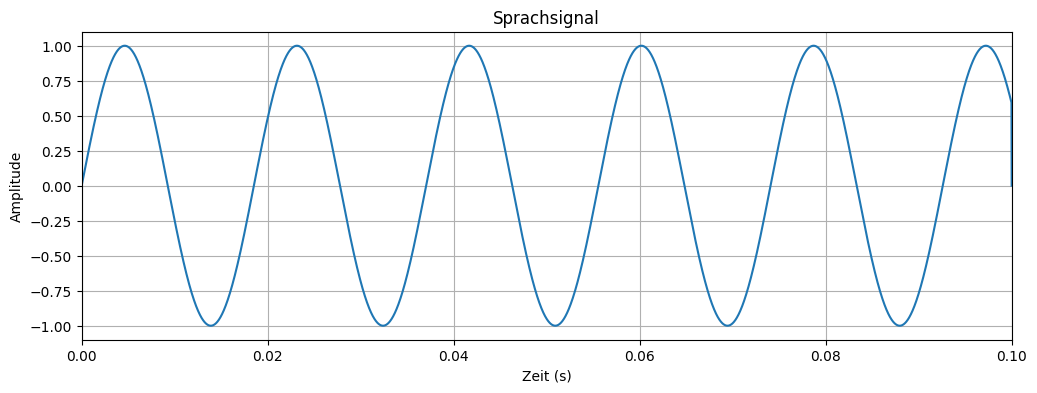

In [230]:
# Audiodatei laden und abspielen
audio_path = 'mein_beat.wav'
ipd.Audio(audio_path)

# Zeitvektor
t = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))

# Plot des Sprachsignals als Funktion der Zeit
plt.figure(figsize=(12, 4))
plt.plot(t, audio_data)
plt.xlim(0,0.1)
plt.title('Sprachsignal')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Audio-Datei wiedergeben
ipd.Audio(audio_path)


## Labor 1
- Optionale Tools: Audiotonic Pro, PyCharm als IDE, Python-Bibliotheken: numpy, scipy.io, matplotlib, ipython.display, sounddevice

#### b. Erzeugen Sie eine Audio-Datei auf ihrem PC mit folgendem Inhalt: "Dies ist eine Suchmaschine". 

- Verwenden Sie als Abtastrate 𝑓𝑎 = 16𝑘𝐻𝑧. 
- Erstellen Sie anschliessend ein Jupyter-Notebook das die erstellte Audio-Datei lädt, abspielt und das Sprachsignal als Funktion der Zeit plottet. 
- Können Sie im geplotteten Sprachsignal Teile ihres Satzes wieder erkennen? Analysieren Sie ihr Sprachsignal schrittweise und beschreiben Sie ihr Ergebnis textuell.

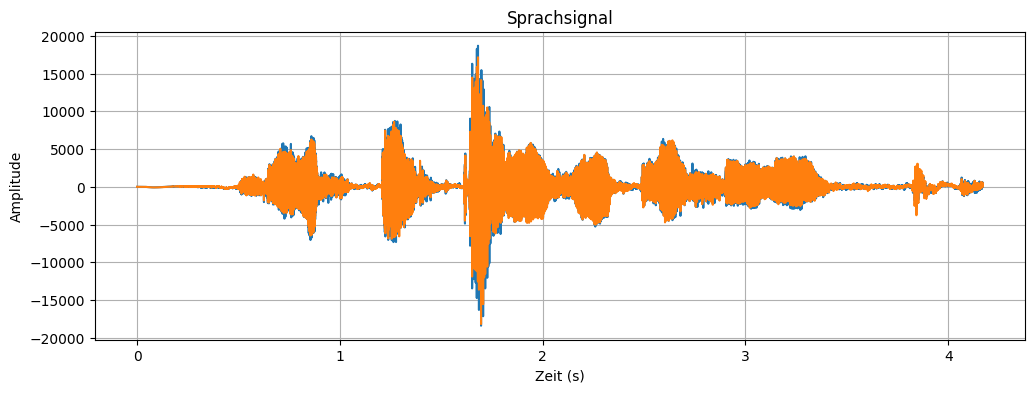

In [231]:
# Pfad zur vorhandenen Audiodatei
audio_path = 'Aufzeichnung.wav'

# Abtastrate
new_sample_rate = 16000

# Einlesen der Audiodatei mit der Abtastrate
_, audio_data = wavfile.read(audio_path, mmap=False)
audio_data = audio_data.astype(np.float32)
audio_data_resampled = librosa.resample(audio_data.T, orig_sr=sample_rate, target_sr=new_sample_rate).T 

# Speichern der neu abgetasteten Audiodatei
wavfile.write('resampled_audio.wav', new_sample_rate, np.int16(audio_data_resampled))

# Audio-Datei einlesen und abspielen
ipd.Audio('resampled_audio.wav')

# Zeitvektor für das geplottete Signal
t = np.linspace(0, len(audio_data_resampled) / new_sample_rate, len(audio_data_resampled))

# Plot des Sprachsignals als Funktion der Zeit
plt.figure(figsize=(12, 4))
plt.plot(t, audio_data_resampled)
plt.title('Sprachsignal')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Audio-Datei wiedergeben
ipd.Audio(audio_path)


### c. Generieren Sie jetzt ein harmonisches Signal bestehend aus dem Kammerton (𝑓0=440Hz) und seiner 2. und 3. Harmonischen. 

- Die Amplitude A und die Zeitdauer 𝑡𝑑 seien gegeben durch:  A= 1.0 und  𝑡𝑑=1s. 
- Tasten Sie das erstellte Signal mit einer Abtastfrequenz fa = 20 ∗ f0 ab und speichern Sie es in einer wave-Audiodatei ab. 
- Plotten Sie das resultierende Oszillogramm und den Kammerton. 
- Lesen Sie die Audio-Datei ein und geben Sie den Klang aus. 

In [232]:
# Parameter
a = 1.0  # Amplitude
td = 1.0  # Zeitdauer in Sekunden
f0 = 440  # Grundfrequenz in Hz
fa = 20 * f0  # Abtastfrequenz in Hz

# Zeitvektor
t = np.linspace(0, td, int(td * fa), endpoint=False)

#### Generierung Kammerton und 2,3. Harmonischen 

In [233]:
# Generierung der Kammerton-Schwingung
kammerton = a * np.sin(2 * np.pi * f0 * t)

In [234]:
# Generierung der 2. und 3. Harmonischen
second_harmonic = a * np.sin(2 * np.pi * 2 * f0 * t)
third_harmonic = a * np.sin(2 * np.pi * 3 * f0 * t)

In [235]:
# Speichern des Signals in einer Wave-Datei
wavfile.write('harmonisches_signal.wav', fa, np.int16(kammerton * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal.wav')

In [236]:
# Speichern des Signals in einer Wave-Datei
wavfile.write('harmonisches_signal.wav', fa, np.int16(second_harmonic * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal.wav')

In [237]:
# Speichern des Signals in einer Wave-Datei
wavfile.write('harmonisches_signal.wav', fa, np.int16(third_harmonic * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal.wav')

In [238]:
# Summierung der harmonischen Signale
combined_signal = kammerton + second_harmonic + third_harmonic

# Speichern des Signals in einer Wave-Datei
wavfile.write('harmonisches_signal.wav', fa, np.int16(combined_signal * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal.wav')

#### Abtasten und abspeichern

In [239]:
# Abtastfrequenz für die Aufnahme
fa_recording = 20 * f0

# Zeitvektor für die Aufnahme
t_recording = np.linspace(0, td, int(td * fa_recording), endpoint=False)

# Speichern des Signals in einer Wave-Datei
wavfile.write('harmonisches_signal.wav', fa_recording, np.int16(combined_signal * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal.wav')


#### Plotten

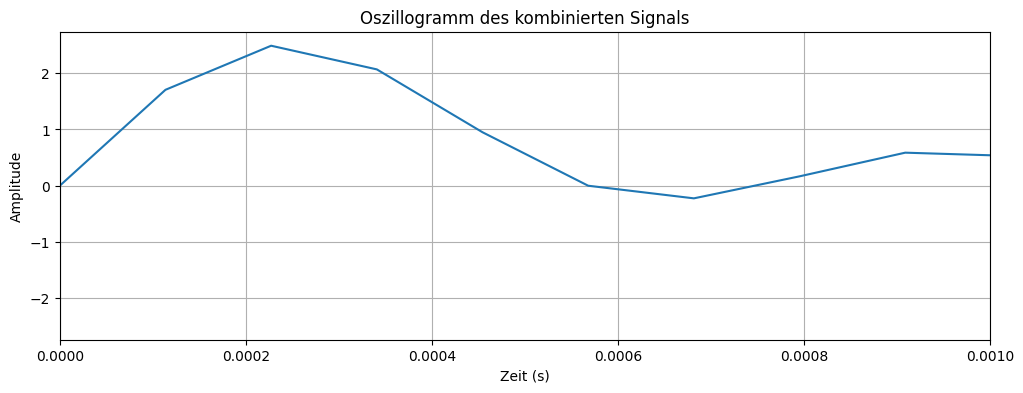

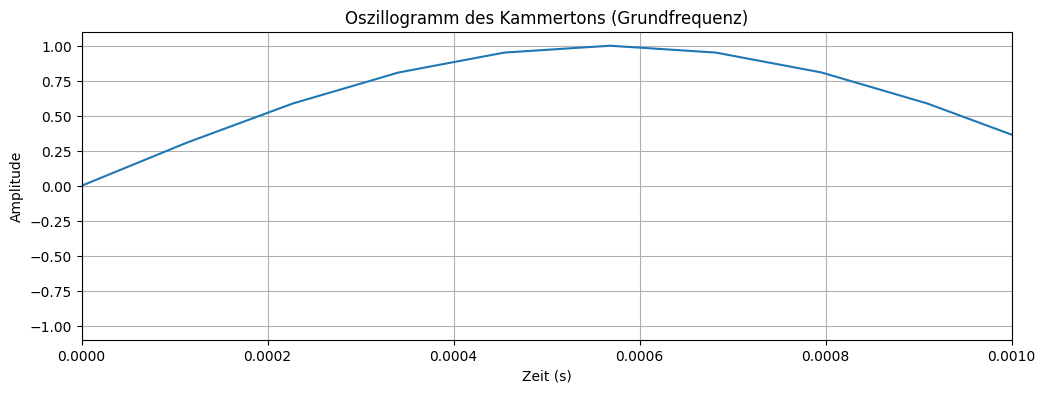

In [240]:
# Plot des Oszillogramms des kombinierten Signals
plt.figure(figsize=(12, 4))
plt.plot(t_recording, combined_signal)
plt.xlim(0,0.001)
plt.title('Oszillogramm des kombinierten Signals')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot des Kammertons (nur die Grundfrequenz)
plt.figure(figsize=(12, 4))
plt.plot(t_recording, kammerton)
plt.xlim(0,0.001)
plt.title('Oszillogramm des Kammertons (Grundfrequenz)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal.wav')


### d. Verändern Sie jetzt die Phase der drei Einzeltöne mit einer Zufallsfunktion und plotten Sie den Klang als Zeitfunktion und geben das Audiosignal aus. 

- Verändert sich der Klang sichtbar und hörbar?

In [241]:
# Zufällige Phasenverschiebung für jede Schwingung generieren
phase_shifts = np.random.uniform(0, 2*np.pi, 3)

# Signal mit zufälliger Phasenverschiebung erzeugen
kammerton_random_phase = a * np.sin(2 * np.pi * f0 * t_recording + phase_shifts[0])
second_harmonic_random_phase = a * np.sin(2 * np.pi * 2 * f0 * t_recording + phase_shifts[1])
third_harmonic_random_phase = a * np.sin(2 * np.pi * 3 * f0 * t_recording + phase_shifts[2])

In [242]:
# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('harmonisches_signal_random_phase.wav', fa_recording, np.int16(kammerton_random_phase * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal_random_phase.wav')

In [243]:
# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('harmonisches_signal_random_phase.wav', fa_recording, np.int16(second_harmonic_random_phase * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal_random_phase.wav')

In [244]:
# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('harmonisches_signal_random_phase.wav', fa_recording, np.int16(third_harmonic_random_phase * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal_random_phase.wav')

In [245]:
# Kombiniertes Signal mit zufälliger Phasenverschiebung erstellen
combined_signal_random_phase = kammerton_random_phase + second_harmonic_random_phase + third_harmonic_random_phase

# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('harmonisches_signal_random_phase.wav', fa_recording, np.int16(combined_signal_random_phase * 32767))


# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal_random_phase.wav')

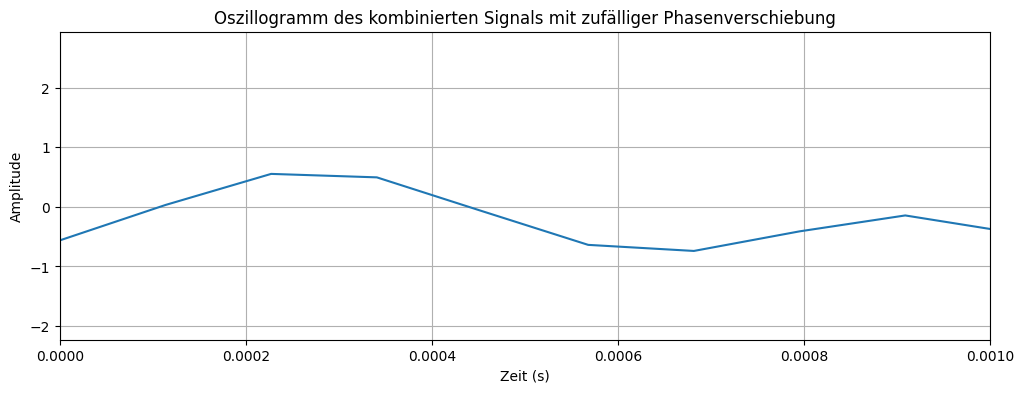

In [246]:
# Plot des Oszillogramms des kombinierten Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t_recording, combined_signal_random_phase)
plt.xlim(0,0.001)
plt.title('Oszillogramm des kombinierten Signals mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal_random_phase.wav')


### e. Mit welchem Schallsignal können sie den Kammerton komplett auslöschen. 

- Generieren Sie in ihrem Programm das resultierende Signal und plotten und spielen Sie dieses ab.

In [247]:
# Parameter
a = 1.0  # Amplitude
td = 1.0  # Zeitdauer in Sekunden
f0 = 440  # Grundfrequenz in Hz
fa = 20 * f0  # Abtastfrequenz in Hz


# Zeitvektor
t = np.linspace(0, td, int(td * fa), endpoint=False)

In [248]:
# Generierung des Signals zur Auslöschung des Kammertons
phase_shift = np.pi  # Phasenverschiebung um pi
canceling_signal = a * np.sin(2 * np.pi * f0 * t + phase_shift)

# Speichern des Signals in einer Wave-Datei
wavfile.write('kammerton_ausloeschung.wav', fa, np.int16(canceling_signal * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('kammerton_ausloeschung.wav')

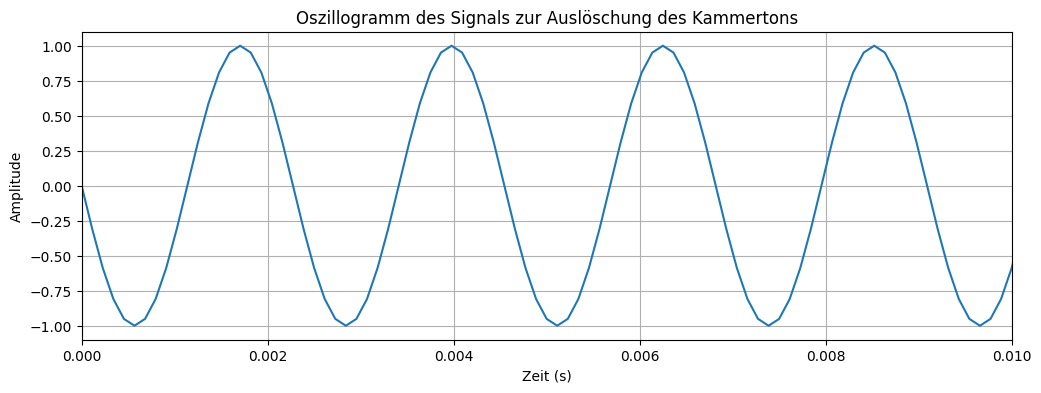

In [249]:
# Plot des Oszillogramms des Signals zur Auslöschung des Kammertons
plt.figure(figsize=(12, 4))
plt.plot(t, canceling_signal)
plt.xlim(0,0.01)
plt.title('Oszillogramm des Signals zur Auslöschung des Kammertons')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
ipd.Audio('kammerton_ausloeschung.wav')


### f. Erstellen Sie ein Programm zur Modellierung einer periodische Rechteckfunktion (f0 =1Hz, Breite=0.5s, fa =8kHz) durch Überlagerung aus seinen ersten 9 harmonischen Komponenten.  

- Plotten Sie die so erzeugte Rechteckfunktion und zusätzlich  die 1. Harmonische und die 9. Harmonische. 
- Erklären und beschreiben Sie den Zusammenhang zwischen den 3 Funktionen. 


In [250]:
# Parameter
f0 = 1  # Grundfrequenz in Hz
width = 0.5  # Breite der Rechteckfunktion in Sekunden
fa = 8000  # Abtastfrequenz in Hz
num_harmonics = 9  # Anzahl der zu verwendenden harmonischen Komponenten

# Zeitvektor
t = np.linspace(0, width, int(width * fa), endpoint=False)

# Fourier-Reihe der Rechteckfunktion mit ungeraden Harmonischen
rectangular_wave = np.zeros_like(t)
for n in range(1, num_harmonics + 1, 2):
    rectangular_wave += (1 / n) * np.sin(2 * np.pi * n * f0 * t)
    
# Speichern des Signals in einer Wave-Datei
wavfile.write('kammerton_ausloeschung.wav', fa, np.int16(rectangular_wave * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('kammerton_ausloeschung.wav')

In [251]:
# 1. Harmonische
first_harmonic = np.sin(2 * np.pi * f0 * t)

# Speichern des Signals in einer Wave-Datei
wavfile.write('kammerton_ausloeschung.wav', fa, np.int16(first_harmonic * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('kammerton_ausloeschung.wav')

In [252]:
# 9. Harmonische
ninth_harmonic = np.sin(2 * np.pi * 9 * f0 * t)

# Speichern des Signals in einer Wave-Datei
wavfile.write('kammerton_ausloeschung.wav', fa, np.int16(ninth_harmonic * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('kammerton_ausloeschung.wav')

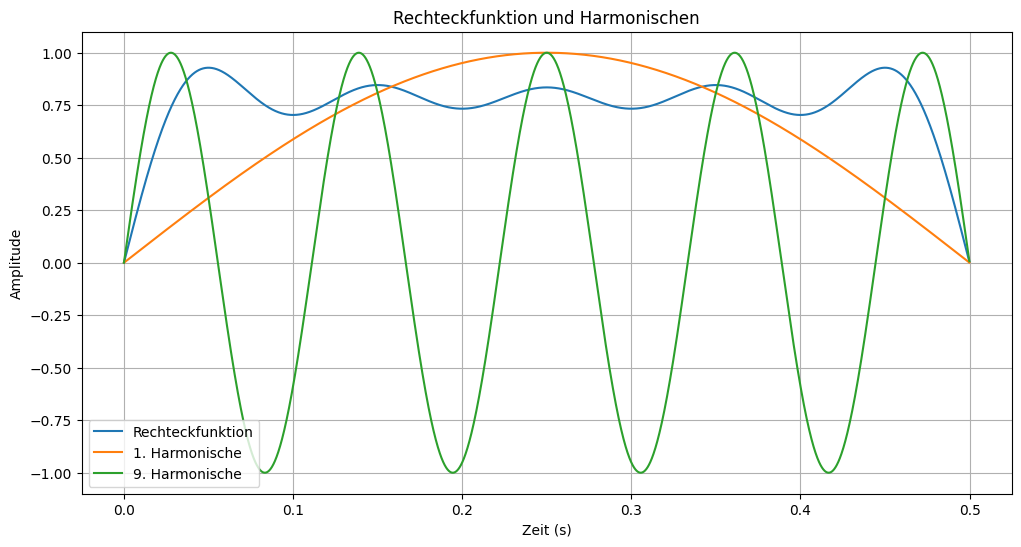

In [253]:
# Plot der Rechteckfunktion und der Harmonischen
plt.figure(figsize=(12, 6))
plt.plot(t, rectangular_wave, label='Rechteckfunktion')
plt.plot(t, first_harmonic, label='1. Harmonische')
plt.plot(t, ninth_harmonic, label='9. Harmonische')
plt.title('Rechteckfunktion und Harmonischen')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


Die Rechteckfunktion und die beiden Harmonischen sind alle periodische Signale, die sich in Bezug auf ihre Frequenzen und Amplituden unterscheiden.

1. **Rechteckfunktion**: Die Rechteckfunktion ist ein periodisches Signal, das aus sich wiederholenden Rechteckimpulsen besteht. Sie hat eine Grundfrequenz \(f_0\) und unendlich viele ungerade Harmonische. Ihr Oszillogramm zeigt periodische Rechteckimpulse, die zwischen den Werten +1 und -1 oszillieren.

2. **1. Harmonische**: Die 1. Harmonische ist die Grundfrequenz selbst, also \(f_0\). Sie ist die niedrigste Frequenzkomponente der Rechteckfunktion und trägt daher am meisten zur Formgebung der Rechteckimpulse bei. Ihr Oszillogramm zeigt eine einfache Sinusschwingung mit der Frequenz \(f_0\).

3. **9. Harmonische**: Die 9. Harmonische hat die Frequenz \(9f_0\). Sie ist eine höhere Frequenzkomponente der Rechteckfunktion und trägt zur Verfeinerung der Rechteckimpulse bei. Ihr Oszillogramm zeigt eine Sinusschwingung mit der Frequenz \(9f_0\), die deutlich mehr Schwingungen pro Periode aufweist als die 1. Harmonische.

Der Zusammenhang zwischen den drei Funktionen besteht darin, dass die Rechteckfunktion als Überlagerung der ungeraden harmonischen Komponenten dargestellt werden kann. Die 1. Harmonische entspricht dabei der Grundfrequenz der Rechteckfunktion und die 9. Harmonische ist eine höhere Frequenzkomponente, die die Feinstruktur der Rechteckimpulse beeinflusst. Durch die Überlagerung dieser harmonischen Komponenten entsteht das periodische Rechtecksignal.

### g. Wie klingt eine periodische Rechteckfunktion mit 𝑓0 =440Hz? 

- Vergleichen Sie den Klang mit einem reinen sinus-Ton 𝑓0 =440Hz?

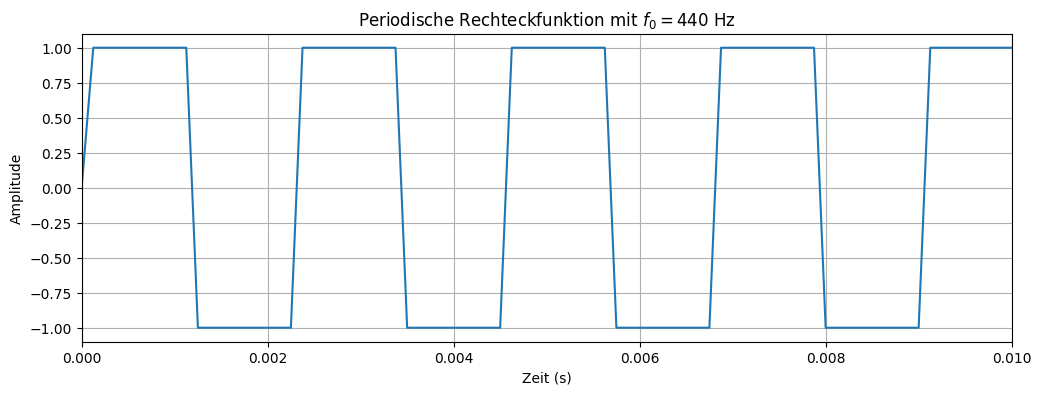

In [254]:
# Parameter
f0 = 440  # Grundfrequenz in Hz
duration = 1  # Dauer der Rechteckfunktion in Sekunden
fs = 8000  # Abtastfrequenz in Hz

# Zeitvektor
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generierung der Rechteckfunktion
rectangular_wave = np.sign(np.sin(2 * np.pi * f0 * t))

# Plot der Rechteckfunktion
plt.figure(figsize=(12, 4))
plt.plot(t, rectangular_wave)
plt.xlim(0,0.01)
plt.title('Periodische Rechteckfunktion mit $f_0 = 440$ Hz')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [255]:
# Parameter
f0 = 440  # Grundfrequenz in Hz
duration = 1  # Dauer der Töne in Sekunden
fs = 8000  # Abtastfrequenz in Hz

# Zeitvektor
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generierung der periodischen Rechteckfunktion
rectangular_wave = np.sign(np.sin(2 * np.pi * f0 * t))

# Generierung des reinen Sinustons
sin_wave = np.sin(2 * np.pi * f0 * t)

# Abspielen der periodischen Rechteckfunktion
print("Klang der periodischen Rechteckfunktion:")
ipd.display(ipd.Audio(rectangular_wave, rate=fs))

# Abspielen des reinen Sinustons
print("Klang des reinen Sinustons:")
ipd.display(ipd.Audio(sin_wave, rate=fs))


Klang der periodischen Rechteckfunktion:


Klang des reinen Sinustons:
